### See gallery and documentation at seaborn.pydata.org

Seaborn comes with built in datasets!
displot/histpllot, jointplot, pairplot, kdeplot


#### Distribution Plots

In [78]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [76]:
import matplotlib.pyplot as plt

In [77]:
import pandas as pd

In [7]:
#load built in dataset called 'tips'
tips = sns.load_dataset('tips')

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


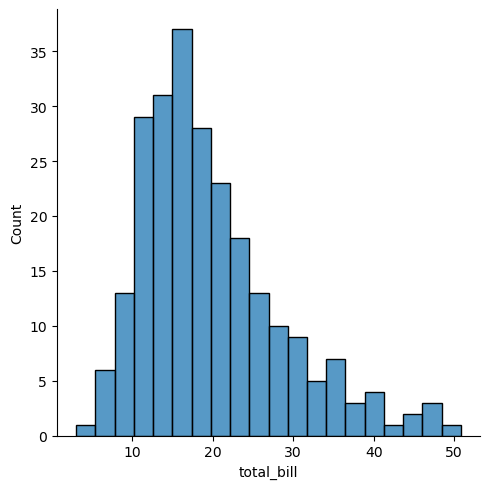

In [14]:
#histplot or displot allows the visualization of a univariate set of observations (one variable)
#sns.histplot(data['column'], bins = x) - shows distribution of where the total bill items lies - 
#bins are created. you can change the number of bins
#sns.displot(data['column'], bins = x)  - they look the same
sns.displot(tips['total_bill'], bins = 20)

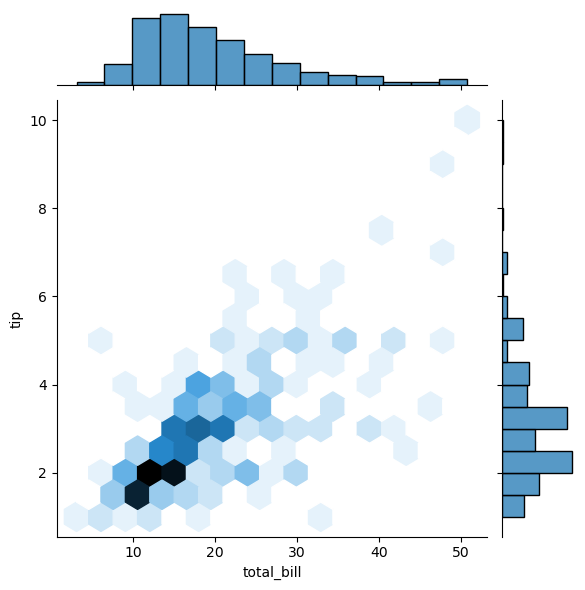

In [19]:
#jointplot is bivariate - compares 2 variables
#sns.jointplot(x= 'column1',y= 'column2',data=dataname, kind='name of plot type')
#plot types: 'hex'=hexagons, 'reg'=linear regression with pearson coefficient and p value, 'kde' = 2 dimensional density 
sns.jointplot(x='total_bill', y='tip', data = tips, kind = 'hex')

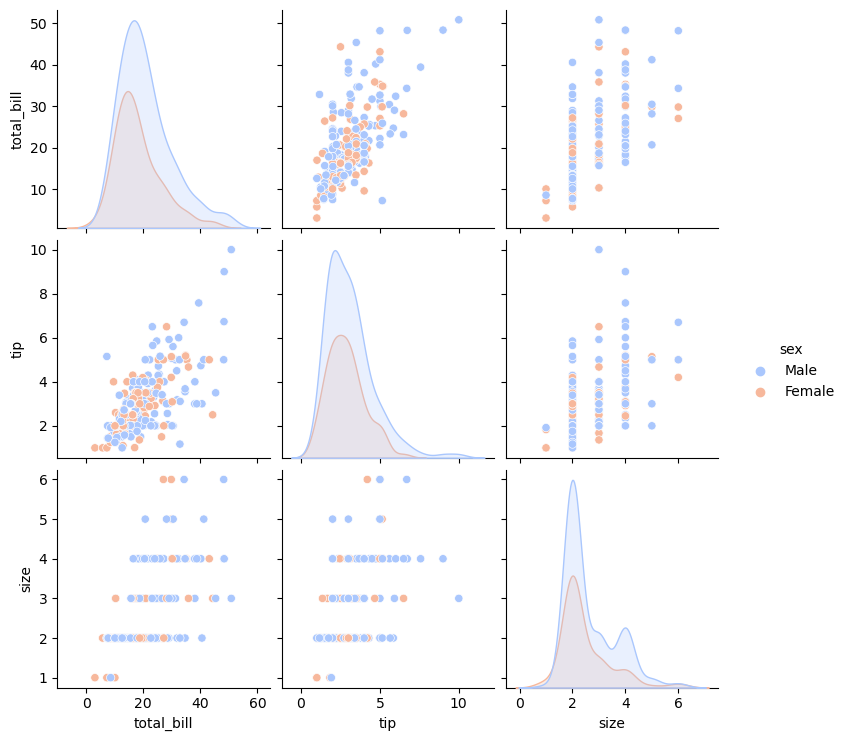

In [21]:
#pairplot is a jointplot for every combination of numerical columns in your dataframe
#you only need to call pairplot, and you can add a hue argument which is a categorical column (male female, state, etc.)
#hue will add a different color for each category
#palette will change the colors of the hues 
#the larger the dataset, the longer this takes. be patient. 
sns.pairplot(tips, hue = 'sex', palette = 'coolwarm')

<Axes: xlabel='total_bill'>

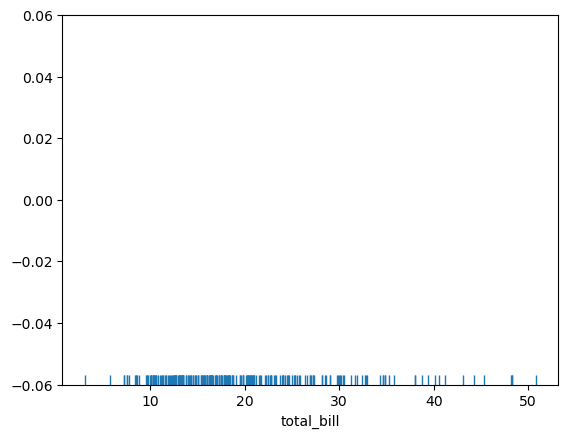

In [23]:
#rugplot for a single column - univariate
#sns.rugplot(dataframe['column'])
sns.rugplot(tips['total_bill'])

<Axes: xlabel='total_bill', ylabel='Density'>

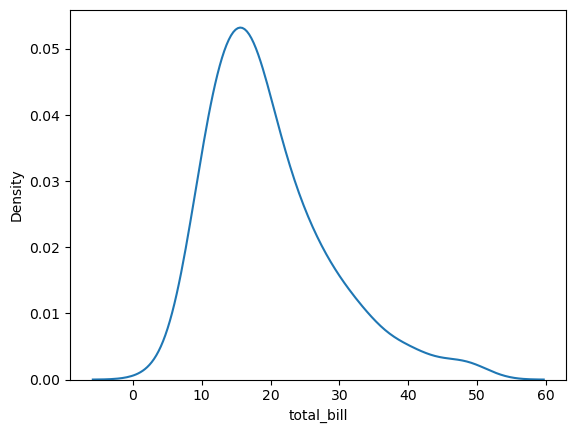

In [25]:
sns.kdeplot(tips['total_bill'])

### Plotting categorical data
### Barplot, countplot, boxplot, violinplot, stripplot, swarmplot

In [28]:
import numpy as np

<Axes: xlabel='sex', ylabel='total_bill'>

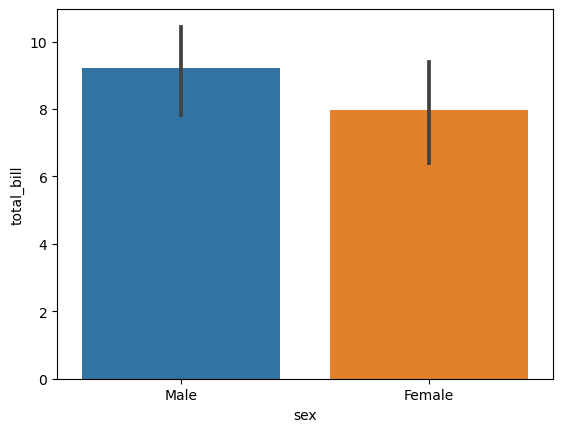

In [29]:
#barplot will show you an average of the numerical data compared to the categorical data
#you can change the aggregation by adding estimator= as an argument. default is mean. 
#np.std is the standard deviation
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

<Axes: xlabel='sex', ylabel='count'>

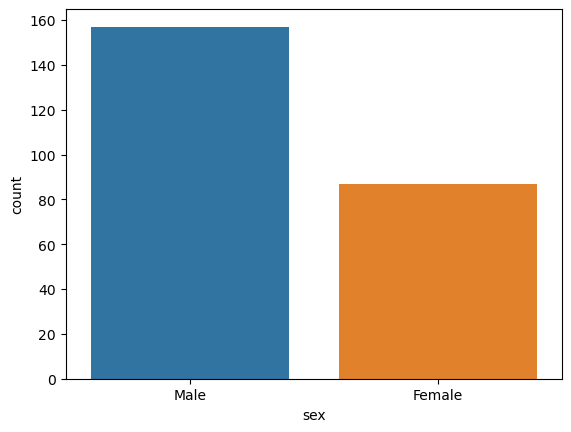

In [30]:
#countplot just counts the occurences of the chosen category
sns.countplot(x='sex',data=tips)

<Axes: xlabel='day', ylabel='tip'>

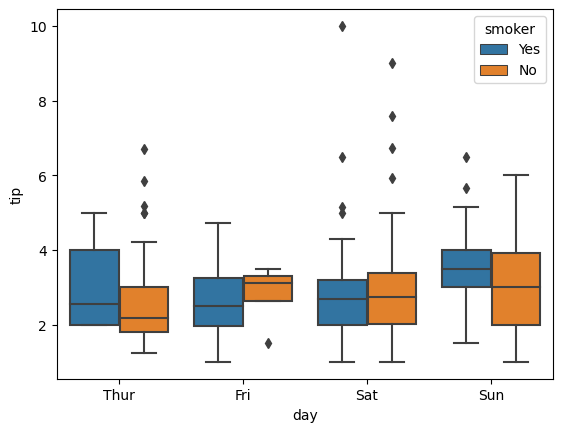

In [37]:
#boxplot is more commonly known as box-and-whisker plot
#box and whiskers are quartiles. 1/4 of data is between bottom of whisker and box, then 2nd 1/4 of data between bottom of box and midline,
#3rd quarter is midline to top of box, 4th quarter is top of box to top of whisker. 
#dots are outliers
#can specify hue - add another dimensional layer by assigning another categorical column 
sns.boxplot(x='day',y='tip',data=tips, hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

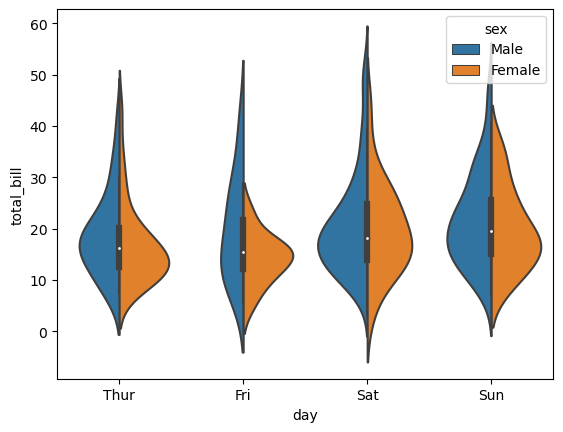

In [36]:
#violinplot shows distribution - uses same arguments as boxplot
#gives more of a distribution of the total datapoints, takes a little more work to understand than boxplots 
#by using split='true', you can put the categories of the hue on the same violin, just on each side, and it gives a better comparison
sns.violinplot(x='day',y='total_bill',data=tips, hue='sex',split='true')

<Axes: xlabel='day', ylabel='total_bill'>

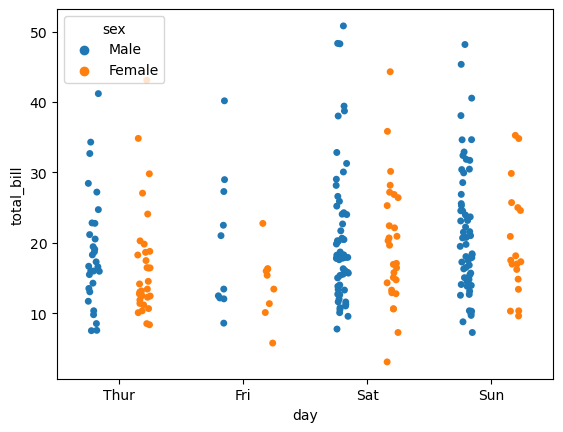

In [43]:
#stripplot draws a scatterplot for categorical data with a jitter so that the dots don't overlap as much. dodge works as split here to separate the categories. 
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True, hue='sex', dodge=True)

<Axes: xlabel='day', ylabel='total_bill'>

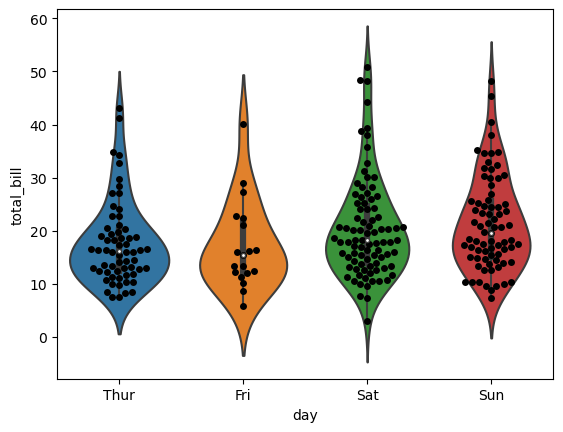

In [45]:
#swarmplot is like combining a stripplot and a violinplot. scatterplot but it's showing all datapoints in a distribution
#swarmplots don't usually scale to very large datasets - don't really use them by themselves. 
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')
sns.violinplot(x='day',y='total_bill',data=tips)

### MATRIX PLOTS
### heatmap, clustermap

In [47]:
#LOAD flights dataset
flights = sns.load_dataset('flights')

In [50]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [56]:
#in order to create a matrix plot, the data needs to be in a matrix format, variables on the columsn and the rows. 
#right now, the first (index) column is not a variable
#to create a matrix format, use pivot table or correlation data
#example using correlation data:
pt = tips.pivot_table(values='tip',index='total_bill',columns='size')


<Axes: xlabel='size', ylabel='total_bill'>

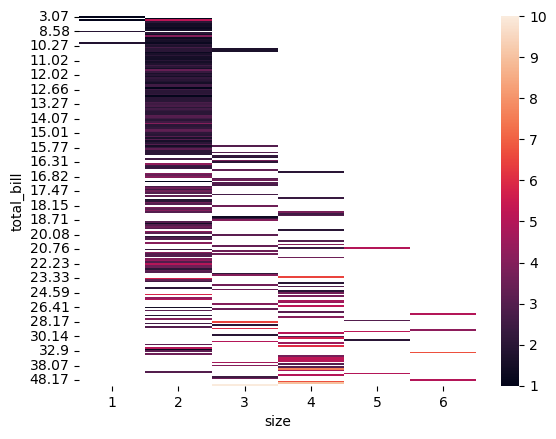

In [57]:
#to use heatmap, pass the df name into sns.heatmap()
#other arguments: annot = True will label each "square", cmap = 'coolwarm' will set the colormap
sns.heatmap(pt)

In [117]:
#to use correlation to create a matrix, you MUST INCLUDE numeric_only=True to avoid an error. it tells it to ignore strings
f_corr=flights.corr(numeric_only=True)
f_corr

,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


In [118]:
tips_corr=tips.corr(numeric_only=True)
tips_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

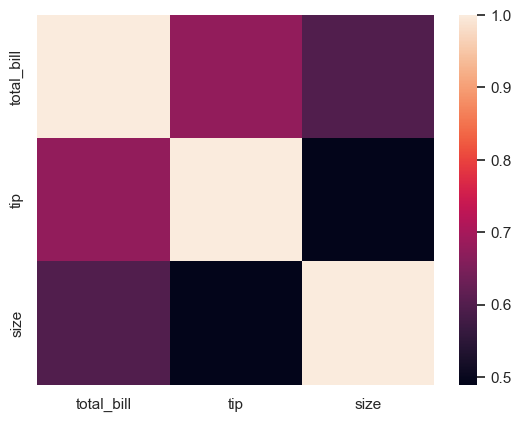

In [119]:
sns.heatmap(tips_corr)

In [62]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

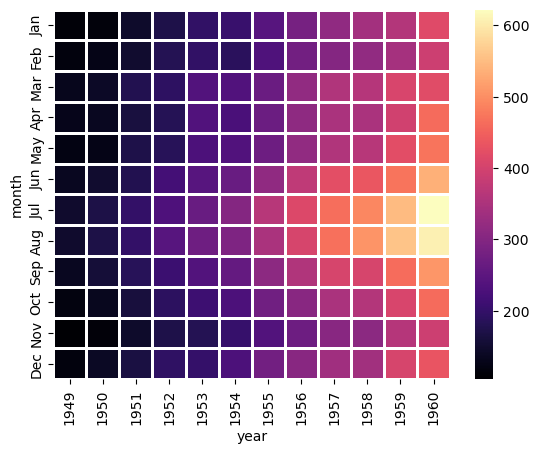

In [65]:
#other arguments for heatmap include linecolor = 'color' and linewidths = 'number'
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=1)

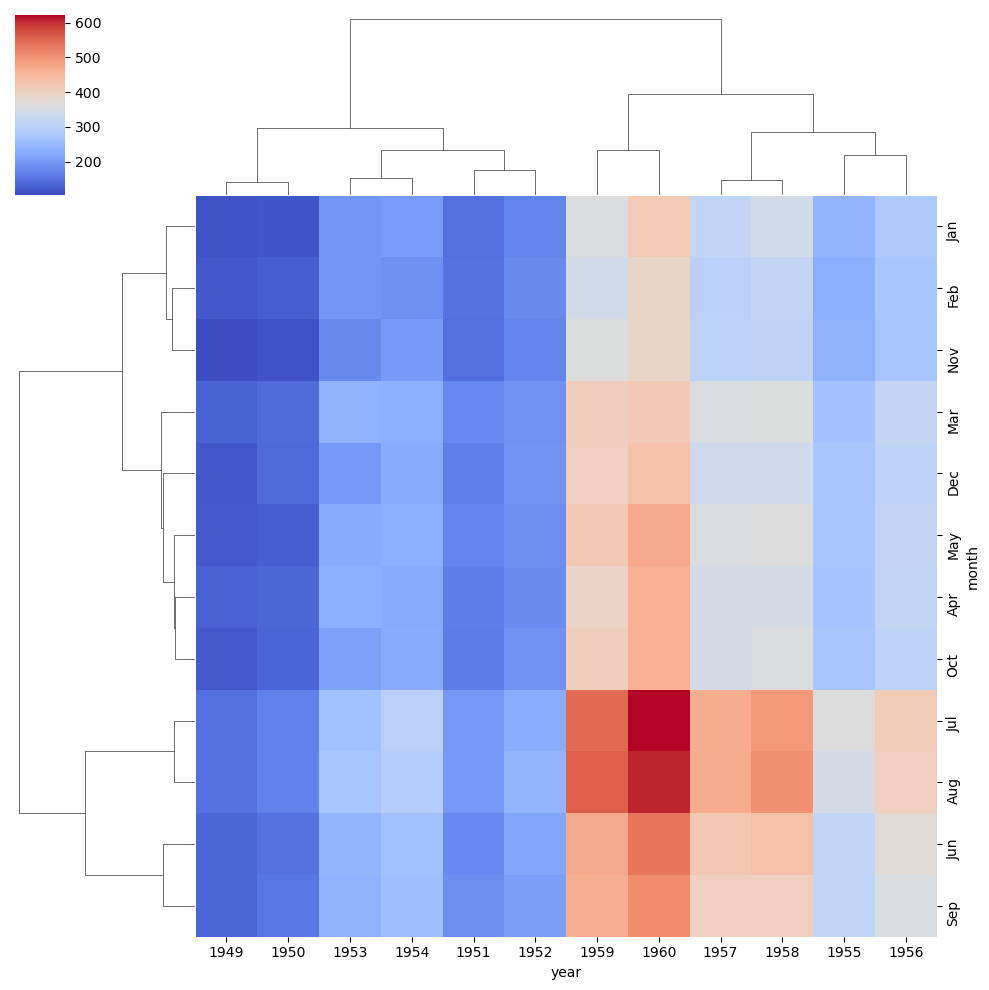

In [67]:
#Clustermap - uses clustering to show a version of a heatmap - tries to cluster rows/columns together based on their similarity
#the rows/columns are not in order, they are clustered together for similarity. months and years are out of order.
#can also pass in argument standard_scale='number' - this changes the scale below from 0-600 to 0-1  
sns.clustermap(fp,cmap='coolwarm')

# Grids

### PairGrid

In [70]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [71]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

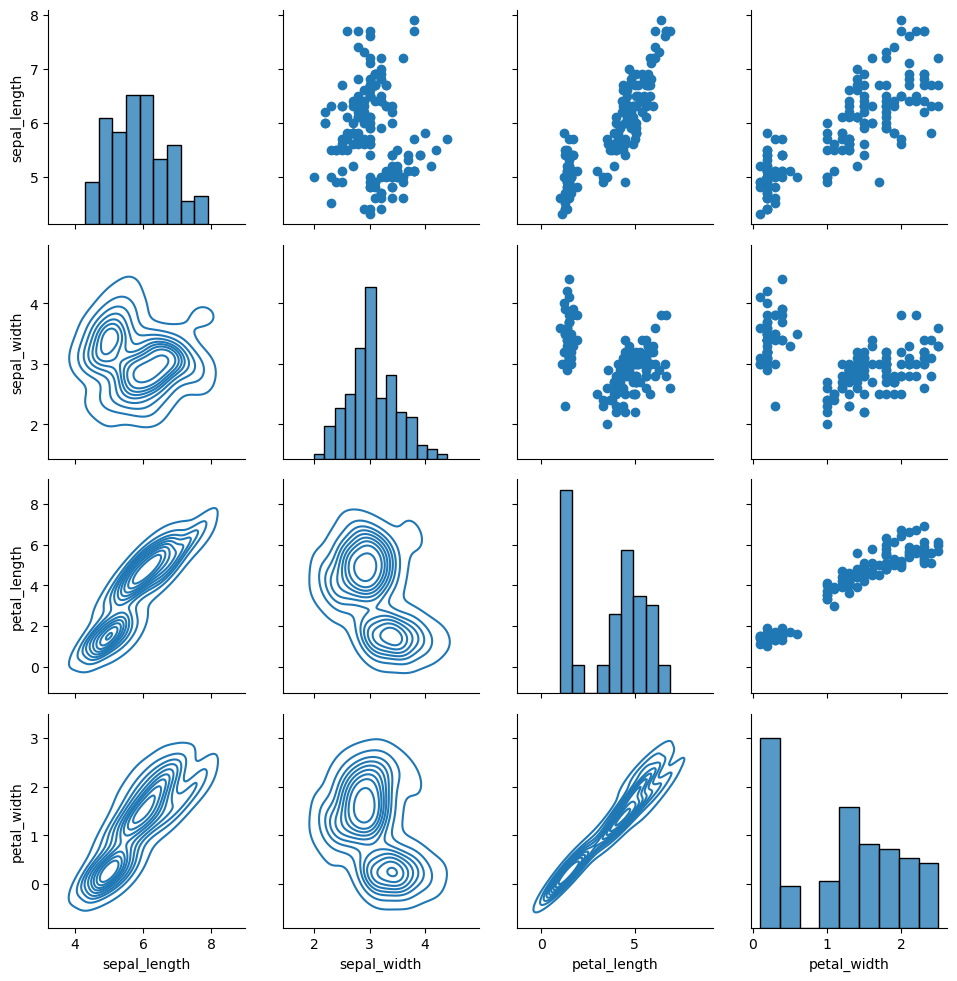

In [79]:
g = sns.PairGrid(iris) #creates the grid for all the variables
g.map_diag(sns.histplot) #plots histograms along the diagonal (matching variables)
g.map_upper(plt.scatter) #plots the 'upper' grid with a matplotlib scatter plot
g.map_lower(sns.kdeplot) #plots the 'lower' grid witth a seaborn kde plot

## Facet Grid
### Use these when you want more customization

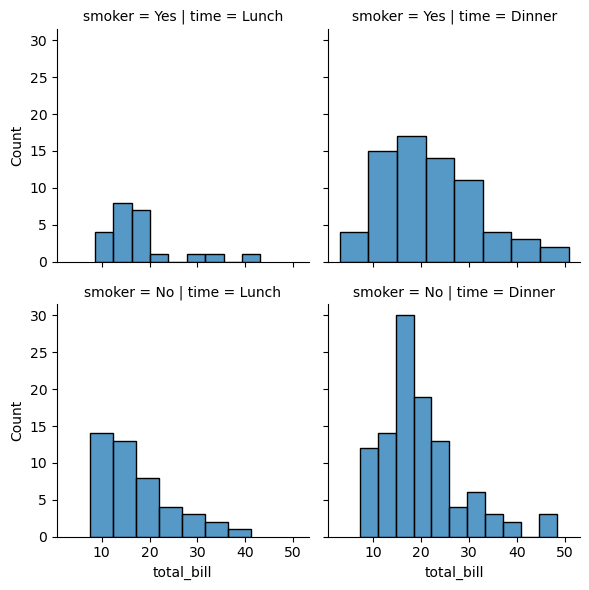

In [82]:
#creates the basic grid with the col and row as the grids with the combination of categorical data
g=sns.FacetGrid(tips,col='time',row='smoker')
#mapping a plot type, separating by the col and row specified above, the 'total_bill' is the numeric item you want to plot
g.map(sns.histplot,'total_bill')

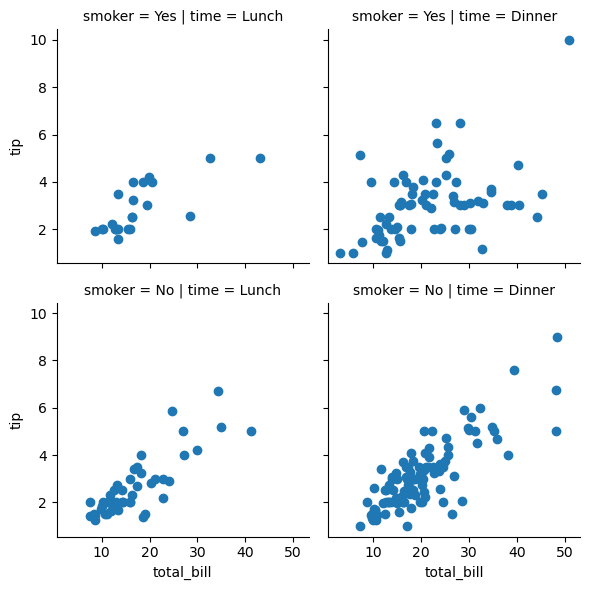

In [84]:
#creates the basic grid with the col and row as the different grids for the categorical data
g=sns.FacetGrid(tips,col='time',row='smoker')
#mapping a scatterplot, which uses 2 numeric variables
g.map(plt.scatter,'total_bill','tip')

## Regression Plots

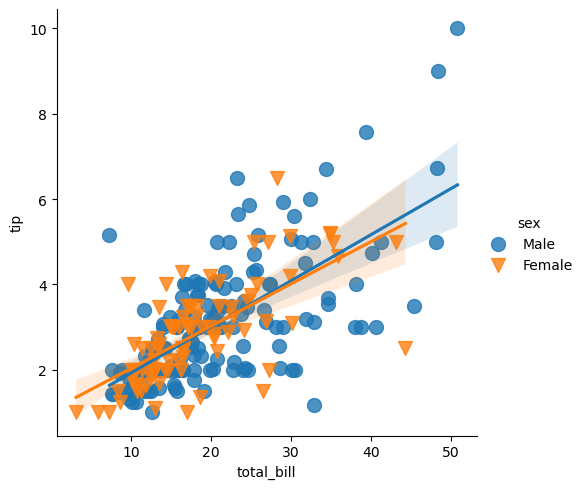

In [89]:
#linear model plot 
#sns.lmplot is calling matplotlib features. to affect the plot, you need to use maplotlib arguments to change the look of the plot
#hue splits it by sex, markers changes the 'dots', scatter_kws changes the size of the dots
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':100})

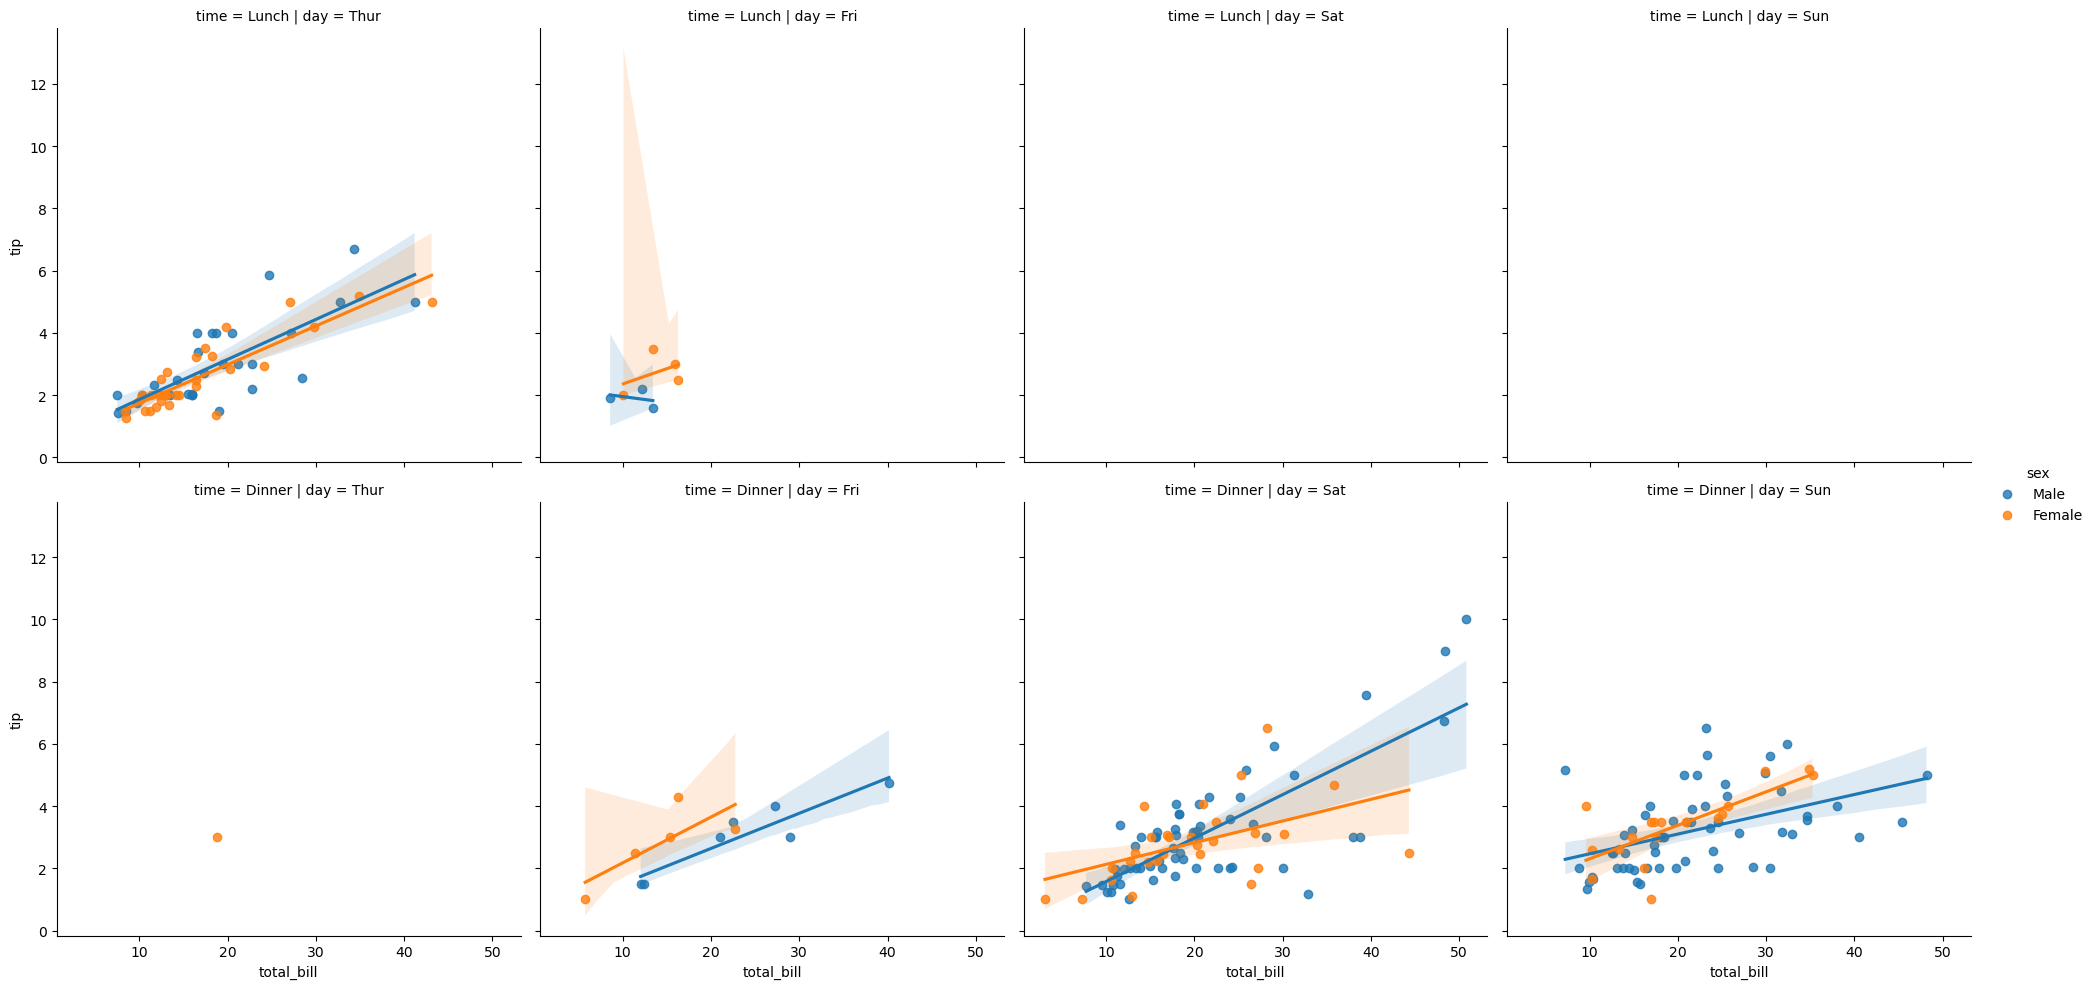

In [92]:
#by adding col= and row= you can separate the plots by 'column' and 'row' into multiple grids just like facetgrid but easier
#can also add hue for more information
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='time',hue='sex')

## Style and Color

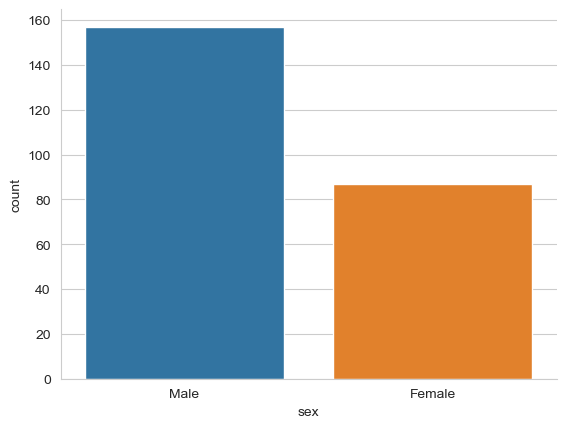

In [96]:
#use set_style() to change the look of your plot
#takes arguments: 'color' for background, 
# 'ticks' will give you tickmarks at the edge of the grid, 
# 'darkgrid' gives you the original grid background,
# 'whitegrid' gives you the white background with gray linemarkers
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)
#to take the 'spines' away, which are the top and right lines, uses despine(). Can remove the left and bottom by setting those to true in the argument
sns.despine()

<Axes: xlabel='sex', ylabel='count'>

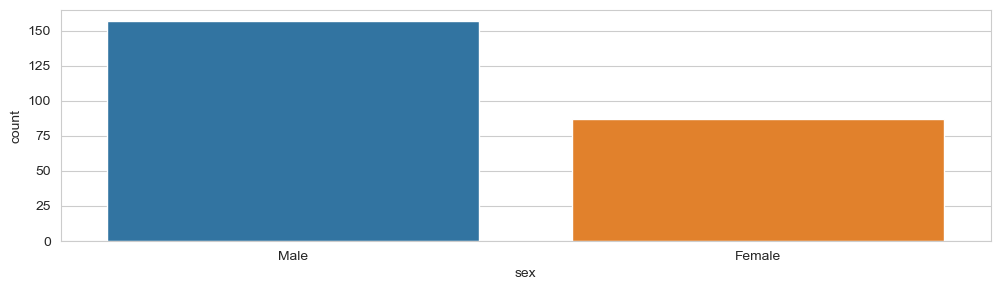

In [99]:
#change the size using matplotlib figure()
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

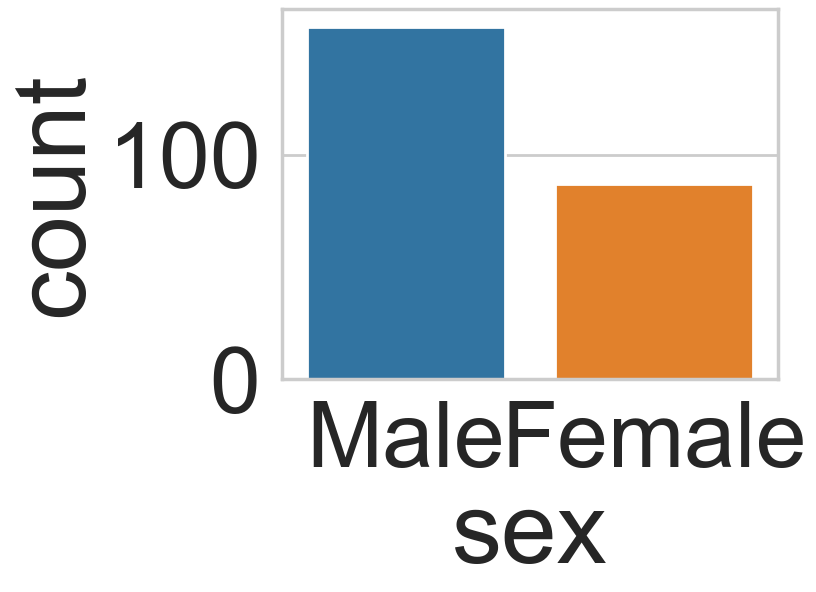

In [100]:
# set_context() can make it bigger so you can display it on a poster, or set to 'notebook' for display in notebook
sns.set_context('poster', font_scale=3)
sns.countplot(x='sex',data=tips)

## Palettes and Colors

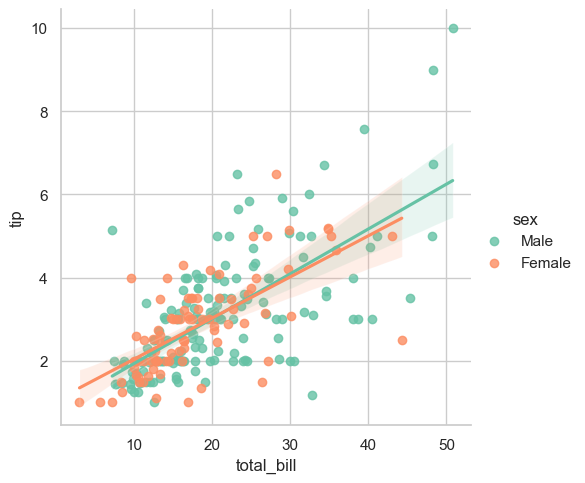

In [116]:
#have to reset the context back to notebook 
sns.set_context('notebook')
sns.lmplot(x='total_bill',y='tip',data = tips, hue='sex',palette='Set2')